In [1]:
from bao import *
from static import *
from stock_data import *
from efficient_frontier import *

with open(PATH_DICTIONARY, "r") as a:
    name_dict = json.load(a)

In [2]:
stock = StockData("./data/stock/", "./stock_dictionary.json")
stock_data = stock.get_data()

In [3]:
with open(PATH_INDEX, "r") as a:
    index_l = json.load(a)

In [4]:
stock_data.drop(columns=["symbol"], inplace=True)

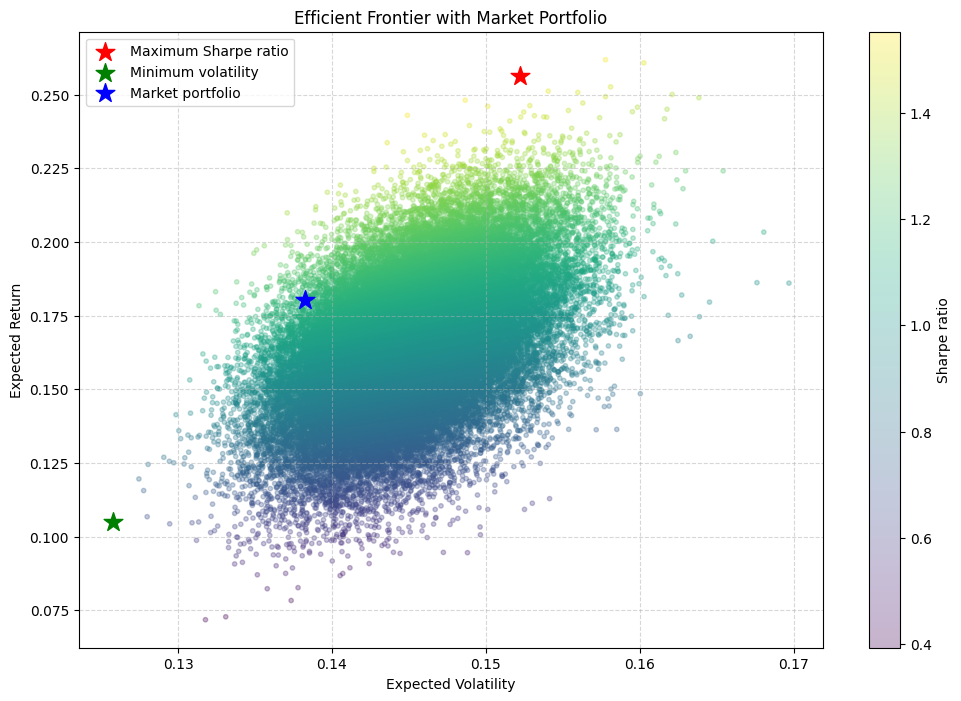


Maximum Sharpe Ratio Portfolio:
{'Return': np.float64(0.2563509896892657), 'Volatility': np.float64(0.152229492862477), 'Sharpe Ratio': np.float64(1.5525965780020263), 'Weights': {'ACB': np.float64(0.050996060857046985), 'BCM': np.float64(0.0020507700158946336), 'BID': np.float64(0.011581049999545163), 'BVH': np.float64(0.05228661531872574), 'CTG': np.float64(0.06608671985243732), 'FPT': np.float64(0.06231156262385777), 'GAS': np.float64(0.012396817914973221), 'GVR': np.float64(0.03664057319903005), 'HDB': np.float64(0.06378007572581439), 'HPG': np.float64(0.061242419466878285), 'MBB': np.float64(0.037569908255804155), 'MSN': np.float64(0.039020904514767044), 'MWG': np.float64(0.06775305951076083), 'PLX': np.float64(0.03855525254151593), 'POW': np.float64(0.05495130503911042), 'SAB': np.float64(0.029338889144667937), 'SHB': np.float64(0.02259223809285536), 'SSB': np.float64(0.005012624735643474), 'SSI': np.float64(0.018437034776320062), 'STB': np.float64(0.04042292447561197), 'TCB': n

In [5]:
# filter VN30 data with simple return * 252 replication
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN30"]))
]
weight = df.pivot_table(index="time", values="market_value", columns="ticker")
# weight = weight.fillna(method="bfill")
# weight = weight.fillna(method="ffill")
weight.dropna(axis=1, inplace=True)

return0 = df[df["ticker"].isin(weight.columns)].pivot_table(
    index="time", values="return", columns="ticker"
)
# Create sample data
# Download stock data using yfinance or use your own data

# Plot efficient frontier
results = plot_efficient_frontier(return0, weight, n_portfolios=50000, risk_free_rate=0.02)

# Print results
print("\nMaximum Sharpe Ratio Portfolio:")
print(results["Maximum Sharpe Ratio Portfolio"])
print("\nMinimum Volatility Portfolio:")
print(results["Minimum Volatility Portfolio"])

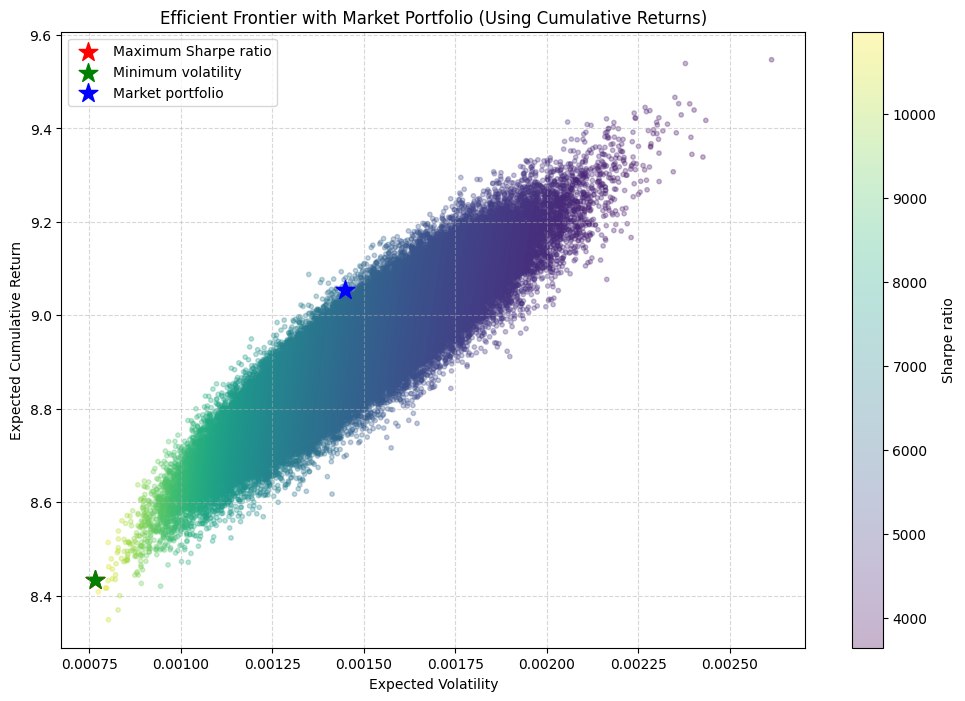


Maximum Sharpe Ratio Portfolio:
{'Return': np.float64(8.434557914267774), 'Volatility': np.float64(0.0007664821785798303), 'Sharpe Ratio': np.float64(10978.1520685303), 'Weights': {'ACB': np.float64(0.004404329569679355), 'BCM': np.float64(0.032401781745900735), 'BID': np.float64(0.04667853577029797), 'BVH': np.float64(0.07748287338919628), 'CTG': np.float64(0.03049693021566014), 'FPT': np.float64(0.0062121518043601965), 'GAS': np.float64(0.06771743931646133), 'GVR': np.float64(0.003716256799519258), 'HDB': np.float64(0.014070543207223995), 'HPG': np.float64(0.055409727128206535), 'MBB': np.float64(0.0076754676391801785), 'MSN': np.float64(0.035636786382780665), 'MWG': np.float64(0.004696417939315926), 'PLX': np.float64(0.01705697417854236), 'POW': np.float64(0.013896889413243695), 'SAB': np.float64(0.0067404871965073415), 'SHB': np.float64(0.07653093035125835), 'SSB': np.float64(0.04619365733709113), 'SSI': np.float64(0.012715946337457493), 'STB': np.float64(0.0022907985613084656), '

In [6]:
# filter VN30 data with simple return * 252 replication
df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["time"].dt.year == 2024)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN30"]))
]
weight = df.pivot_table(index="time", values="market_value", columns="ticker")
weight.dropna(axis=1, inplace=True)

return0 = df[df["ticker"].isin(weight.columns)].pivot_table(
    index="time", values="return", columns="ticker"
)
# Create sample data
# Download stock data using yfinance or use your own data

# Plot efficient frontier
results = plot_efficient_frontier_log_cum(return0, weight, n_portfolios=100000, risk_free_rate=0.02)

# Print results
print("\nMaximum Sharpe Ratio Portfolio:")
print(results["Maximum Sharpe Ratio Portfolio"])
print("\nMinimum Volatility Portfolio:")
print(results["Minimum Volatility Portfolio"])